In [32]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [47]:
df = pd.read_csv('/content/drive/My Drive/DS_projects/share/df.csv')

## Clusterinsiu nuzudytus pagal rase, amziu, lyti ir signs of mental illness

In [49]:
# extracting relevant info
cluster_df = df[['age', 'gender', 'race', 'signs_of_mental_illness']].copy()

In [52]:
# encoding gender
cluster_df['gender'] = cluster_df.gender.apply(lambda x: 1 if x=='m' else 0)

# encoding race
encoded_data = pd.get_dummies(cluster_df.race, prefix='race')
for race in encoded_data.columns.tolist():
  cluster_df[race] = encoded_data[race]

# encoding mental illness
cluster_df['signs_of_mental_illness'] = (cluster_df
                                      .signs_of_mental_illness
                                      .apply(lambda x: 1 if x==True else 0))

# dropping not encoded race
cluster_df.drop(['race'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f2f83294290>,
                 k=None, metric=None, model=None, timings=True)

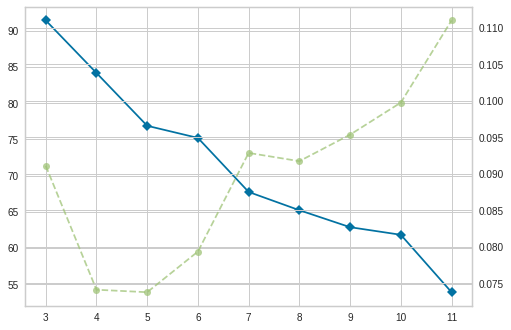

In [36]:
# initializing cluster algorithm
kmeans = KMeans(random_state=42)

# searching for optimal number of centroids
visualizer = KElbowVisualizer(kmeans, k=(3,12))
visualizer.fit(cluster_df.values)

In [55]:
# initializing cluster algorithm
kmeans = KMeans(random_state=42, n_clusters=7)

# training
kmeans.fit(cluster_df.values)

# extracting meanings
cluster_df['cluster'] = kmeans.labels_

In [61]:
# searching for patterns
for i in range(7):
  df = cluster_df[cluster_df['cluster'] == i]
  print(f'Cluster number {i+1}. Information as follows:')
  print(f'Total number of killed in cluster: {df.shape[0]}')
  print(f'Age min / avg / max: {df.age.min()}, {round(df.age.mean(),2)}, {df.age.max()}')
  print(f'Males: {round(df[df.gender == 1].shape[0]/df.shape[0]*100, 2)} %')
  print(f'Signs of mental illness: {round(df[df.signs_of_mental_illness == 1].shape[0]/df.shape[0]*100, 2)} %')
  print(f'Asians: {round(df[df.race_a == 1].shape[0]/df.shape[0]*100, 2)} %')
  print(f'Blacks: {round(df[df.race_b == 1].shape[0]/df.shape[0]*100, 2)} %')
  print(f'Hispanic: {round(df[df.race_h == 1].shape[0]/df.shape[0]*100, 2)} %')
  print(f'Natives: {round(df[df.race_n == 1].shape[0]/df.shape[0]*100, 2)} %')
  print(f'Whites: {round(df[df.race_w == 1].shape[0]/df.shape[0]*100, 2)} %')
  print(f'Others: {round(df[df.race_o == 1].shape[0]/df.shape[0]*100, 2)} %')

  print('*'*25)
  print('\n\n')
  

Cluster number 1. Information as follows:
Total number of killed in cluster: 248
Age min / avg / max: 47, 50.46, 54
Males: 96.37 %
Signs of mental illness: 31.45 %
Asians: 1.21 %
Blacks: 12.1 %
Hispanic: 9.68 %
Natives: 0.4 %
Whites: 68.15 %
Others: 8.47 %
*************************



Cluster number 2. Information as follows:
Total number of killed in cluster: 494
Age min / avg / max: 25, 28.01, 31
Males: 95.95 %
Signs of mental illness: 23.28 %
Asians: 1.42 %
Blacks: 30.36 %
Hispanic: 19.23 %
Natives: 1.62 %
Whites: 42.11 %
Others: 5.26 %
*************************



Cluster number 3. Information as follows:
Total number of killed in cluster: 172
Age min / avg / max: 55, 58.84, 65
Males: 95.93 %
Signs of mental illness: 32.56 %
Asians: 1.74 %
Blacks: 12.79 %
Hispanic: 5.81 %
Natives: 0.0 %
Whites: 69.77 %
Others: 9.88 %
*************************



Cluster number 4. Information as follows:
Total number of killed in cluster: 383
Age min / avg / max: 6, 20.79, 24
Males: 96.08 %
Signs of